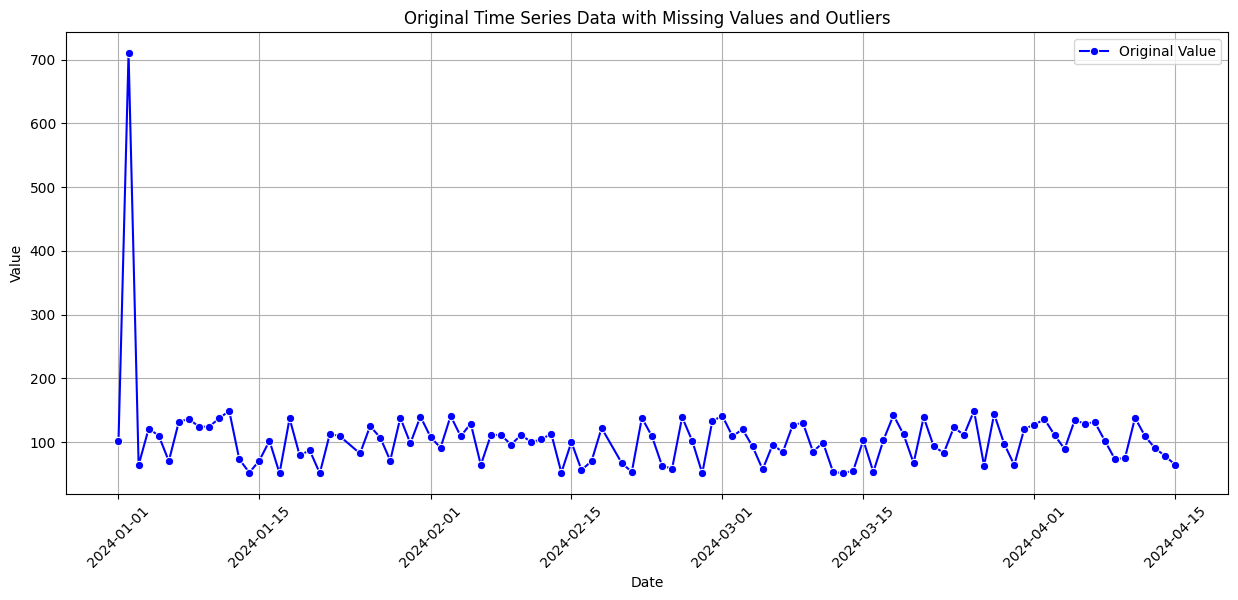

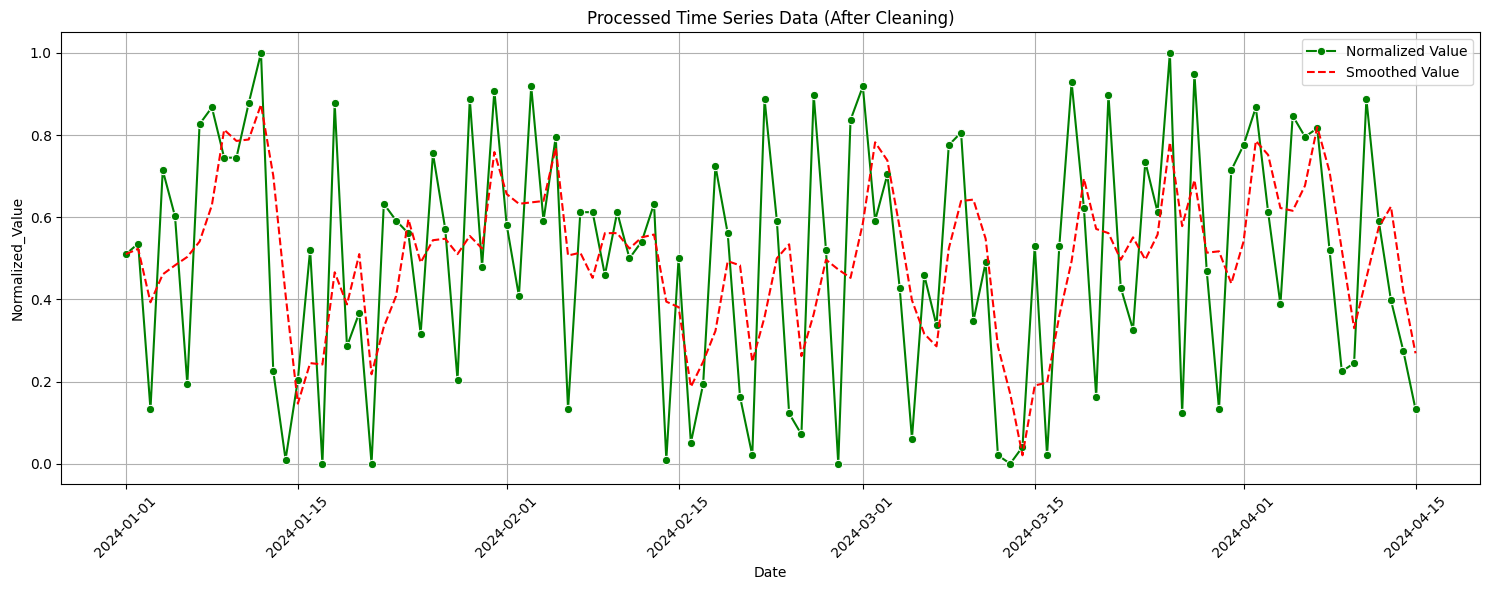

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate random time series data (100-110 samples)
n_samples = np.random.randint(100, 110)
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

# Introduce missing values and an outlier
data[np.random.choice(n_samples, size=2, replace=False)] = np.nan  # Missing values
data[np.random.randint(0, n_samples)] *= 5  # Outlier

# Create the DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})

# Plot original data
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Value', data=df, marker='o', label='Original Value', color='blue')
plt.title('Original Time Series Data with Missing Values and Outliers')
plt.xticks(rotation=45)
plt.grid()

# Data cleaning
df['Value'].fillna(df['Value'].mean(), inplace=True)  # Handle missing values
upper_limit = df['Value'].quantile(0.99)  # Calculate upper limit for outliers
df['Value'] = np.where(df['Value'] > upper_limit, df['Value'].median(), df['Value'])  # Cap outliers

# Normalize and smooth data
df['Normalized_Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())
df['Smoothed_Value'] = df['Normalized_Value'].rolling(window=3, min_periods=1).mean()

# Plot processed data
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Normalized_Value', data=df, marker='o', label='Normalized Value', color='green')
sns.lineplot(x='Date', y='Smoothed_Value', data=df, linestyle='dashed', label='Smoothed Value', color='red')
plt.title('Processed Time Series Data (After Cleaning)')
plt.xticks(rotation=45)
plt.grid()

# Show plots
plt.tight_layout()
plt.show()